In [1]:
import os
import datetime
from poes import dwnld_poes, get_aur_bnd, poes_plot_utils
from davitpy import utils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
# dates to download raw poes files
sTimePOES = datetime.datetime( 2015,2,2 )
eTimePOES = datetime.datetime( 2015,2,2 )
rawDir = "../data/poes/raw/"
bndDir = "../data/poes/bnd/"

In [3]:
# dir to store raw poes files
dayCount = (eTimePOES - sTimePOES).days + 1
# Loop through the days and download files
for inpDate in (sTimePOES + \
            datetime.timedelta(n) for n in range(dayCount)):
    poesDwnldObj = dwnld_poes.PoesDwnld(inpDate)
    # NOTE : set a proper outdir otherwise the data
    # is saved in the working directory by default
    poesFiles = poesDwnldObj.get_all_sat_data(outDir=rawDir)

downloading file from url-->http://satdat.ngdc.noaa.gov/sem/poes/data/processed/ngdc/uncorrected/full/2015/noaa18/poes_n18_20150202_proc.nc
moving file to destination folder poes_n18_20150202_proc.nc
outDir--> ../data/poes/raw
downloading file from url-->http://satdat.ngdc.noaa.gov/sem/poes/data/processed/ngdc/uncorrected/full/2015/metop01/poes_m01_20150202_proc.nc
moving file to destination folder poes_m01_20150202_proc.nc
outDir--> ../data/poes/raw
downloading file from url-->http://satdat.ngdc.noaa.gov/sem/poes/data/processed/ngdc/uncorrected/full/2015/noaa19/poes_n19_20150202_proc.nc
moving file to destination folder poes_n19_20150202_proc.nc
outDir--> ../data/poes/raw
downloading file from url-->http://satdat.ngdc.noaa.gov/sem/poes/data/processed/ngdc/uncorrected/full/2015/metop02/poes_m02_20150202_proc.nc
moving file to destination folder poes_m02_20150202_proc.nc
outDir--> ../data/poes/raw
downloading file from url-->http://satdat.ngdc.noaa.gov/sem/poes/data/processed/ngdc/uncor

In [6]:
# Read data from the POES files
# and get the auroral boundary location
# by fitting a circle
poesRdObj = get_aur_bnd.PoesAur()
( poesAllEleDataDF, poesAllProDataDF ) = poesRdObj.read_poes_data_files(\
                                            poesRawDate=sTimePOES,\
                                            poesRawDir=rawDir )
# Or you can uncomment the line below and read the data!
# ( poesAllEleDataDF, poesAllProDataDF ) = poesRdObj.read_poes_data_files(poesFiles)
# Get for a given time get the closest satellite passes
# We can do this at multiple instances for a given time range/step
timeRange = [ poesAllEleDataDF["date"].min(),\
                 poesAllEleDataDF["date"].max() ]
# aurPassDF contains closest passes for a given time 
# for all the satellites in both the hemispheres!
aurPassDF = poesRdObj.get_closest_sat_passes( poesAllEleDataDF,\
                                    poesAllProDataDF, timeRange )
# determine auroral boundaries from all the POES satellites
# at a given time. The procedure is described in the code! 
# go over it!!!
eqBndLocsDF = poesRdObj.get_nth_ele_eq_bnd_locs( aurPassDF,\
                                                poesAllEleDataDF )
# to get an estimate of the auroral boundary! fit a circle
# to the boundaries determined from each satellite!
# The fits are written to a file and can be stored in 
# a given location
# NOTE : set a proper outdir otherwise the data
# is saved in the working directory by default
bndDF=poesRdObj.fit_circle_aurbnd(eqBndLocsDF, outDir=bndDir)
print "ESTIMATED BOUNDARY"
print bndDF.head()
print "ESTIMATED BOUNDARY"

fileList not set! Working with poesRawDate & poesRawDir
saving to file---> ../data/poes/bnd/poes-fit-20150202.txt
ESTIMATED BOUNDARY
   MLAT  MLON      date  time
0  60.2   0.0  20150202  0100
1  58.0  15.0  20150202  0100
2  56.2  30.0  20150202  0100
3  54.8  45.0  20150202  0100
4  54.1  60.0  20150202  0100
ESTIMATED BOUNDARY


reading boundary data from--> ../data/poes/bnd/poes-fit-20150202.txt


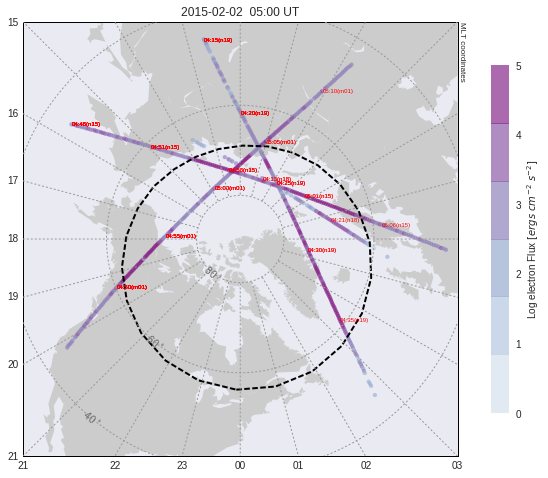

In [11]:
# Plot all closest (in time) satellite passes at a given time
# and also overlay the estimated auroral boundary
pltDate = datetime.datetime(2015,2,2)
selTime = datetime.datetime(2015,2,2,5,0)
coords = "mlt"

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
m = utils.plotUtils.mapObj(boundinglat=40., coords=coords,\
                           lat_0=90., lon_0=0, datetime=selTime)
poesPltObj = poes_plot_utils.PlotUtils(pltDate, pltCoords=coords)
poesPltObj.overlay_closest_sat_pass(selTime,m,ax,rawDir)
# two ways to overlay estimated boundary!
# poesPltObj.overlay_equ_bnd(selTime,m,ax,rawSatDir="/tmp/poes/raw/")
poesPltObj.overlay_equ_bnd(selTime,m,ax,\
                inpFileName=bndDir + "poes-fit-" + pltDate.strftime("%Y%m%d") + ".txt")
fig.savefig("../figs/poes-demo2.pdf",bbox_inches='tight')